<h1>1. Install Dependencies</h1>

In [ ]:
# Clone Ultratytics' yolov5 github repository to the Desktop

## git clone https://github.com/ultralytics/yolov5

In [ ]:
# Install Pytorch via conda
# conda config --set ssl_verify false

## conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

# Python version 3.9.13
# Installed Pytorch via conda - version 1.13.0
    # import torch
    # print(torch.__version__)
# Installed torchvision via conda - version 0.14.0
    # import torchvision
    # print(torchvision.__version__)
# Installed torchaudio via conda - version 0.13.0
    # import torchaudio
    # print(torchaudio.__version__)
# CUDA version 11.7
    # nvcc --version

In [ ]:
# Install yolov5 requirements

## cd Desktop/yolov5
## pip install -r requirements.txt

<h3>Import Python Modules</h3>

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

import time
import math
import datetime
from datetime import date
import mysql.connector

In [2]:
# Check Pytorch Usability

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
Quadro M1200


<h3>Check Working Directory</h3>

In [3]:
pwd # Print working directory

'C:\\Users\\Z0142848\\OneDrive - ZF Friedrichshafen AG\\Desktop\\industrial_vision\\yolov5'

In [4]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

<h1>2. Load Model</h1>

In [5]:
# Import module from Ultratytics repo

model = torch.hub.load('ultralytics/yolov5', 'yolov5n')
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#model = torch.hub.load('ultralytics/yolov5', 'yolov5l')

Using cache found in C:\Users\Z0142848/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-19 Python-3.9.13 torch-1.13.0 CUDA:0 (Quadro M1200, 4096MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


In [6]:
# Check Model in Use

model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

<h1>3. Make Detections</h1>

In [7]:
# First prediction

img = 'https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg'

In [8]:
# Make detections of image from model, and print the result

results = model(img)
results.print()

image 1/1: 1080x810 4 persons, 1 bus
Speed: 501.3ms pre-process, 17.0ms inference, 6.0ms NMS per image at shape (1, 3, 640, 480)


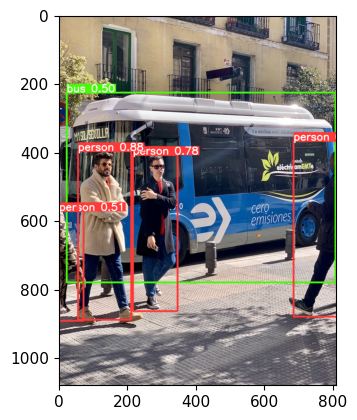

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[172, 148, 122],
         [170, 146, 120],
         [177, 153, 125],
         ...,
         [184, 170, 157],
         [185, 171, 158],
         [185, 171, 158]],
 
        [[177, 153, 127],
         [174, 150, 124],
         [179, 155, 127],
         ...,
         [185, 171, 158],
         [186, 172, 159],
         [186, 172, 159]],
 
        [[178, 154, 128],
         [176, 152, 126],
         [178, 154, 126],
         ...,
         [185, 171, 158],
         [185, 171, 158],
         [185, 171, 158]],
 
        ...,
 
        [[191, 185, 185],
         [188, 182, 182],
         [185, 179, 179],
         ...,
         [112, 107, 114],
         [111, 105, 115],
         [112, 106, 116]],
 
        [[163, 157, 157],
         [186, 180, 180],
         [191, 185, 185],
         ...,
         [103,  97, 107],
         [ 98,  92, 102],
         [104,  98, 108]],
 
        [[118, 112, 112],
         [166, 160, 160],
         [174, 170, 169],
         ...,
         [ 95,  89,  99],
  

In [11]:
results.xyxy

[tensor([[5.52255e+01, 3.97549e+02, 2.10773e+02, 8.89110e+02, 8.76082e-01, 0.00000e+00],
         [6.83319e+02, 3.67370e+02, 8.10000e+02, 8.80802e+02, 8.04214e-01, 0.00000e+00],
         [2.15794e+02, 4.08700e+02, 3.45669e+02, 8.64763e+02, 7.84171e-01, 0.00000e+00],
         [0.00000e+00, 5.72826e+02, 7.19939e+01, 8.92413e+02, 5.13761e-01, 0.00000e+00],
         [2.24322e+01, 2.26582e+02, 8.05944e+02, 7.80871e+02, 4.97931e-01, 5.00000e+00]], device='cuda:0')]

In [12]:
# Second Prediction

img2 = 'traffic0.jpg'

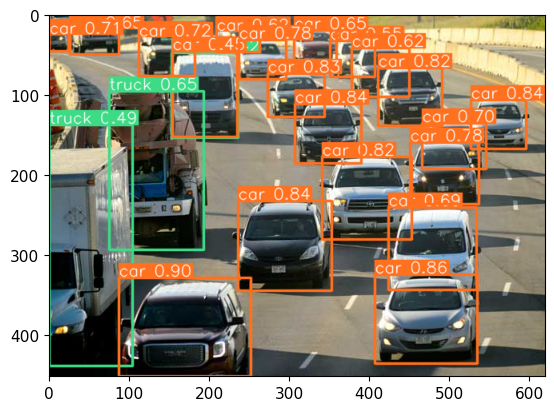

In [13]:
results2 = model(img2)
%matplotlib inline
plt.imshow(np.squeeze(results2.render()))
plt.show()

<h1>4. Real Time Detection</h1>

In [14]:
# ORIGINAL W/ FPS

cap = cv2.VideoCapture('traffic.mp4')
startTime = 0

height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

while cap.isOpened():
    ret, frame = cap.read()
    
    # Draw guidelines
    cv2.line(frame, (0, int(height/3)), (int(width), int(height/3)), (220,220,220), 1)
    cv2.line(frame, (0, int(2*height/3)), (int(width), int(2*height/3)), (220,220,220), 1)
    cv2.line(frame, (int(width/3), 0), (int(width/3), int(height)), (220,220,220), 1)
    cv2.line(frame, (int(2*width/3), 0), (int(2*width/3), int(height)), (220,220,220), 1)
    
    #Make detections
    results = model(frame)
    
    #results.print()
    #cv2.line(np.squeeze(results.render()), (0, 0), (1000, 1000),(0,255,0), 10)
    
    #FPS
    currentTime = time.time()
    fps = 1/(currentTime - startTime)
    startTime = currentTime
    cv2.putText(frame, "FPS: " + str(int(fps)), (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0),3)  
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    #cv2.imshow('YOLO', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
        
cap.release()
cv2.destroyAllWindows()

In [17]:
# DEPRECATED

cap = cv2.VideoCapture('traffic.mp4')
#cap = cv2.VideoCapture(0)

startTime = 0
# height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
# width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

#print(height, width)

while cap.isOpened():
    ret, frame = cap.read()
    distances = []
    
    # Draw guidelines
    # cv2.line(frame, (0, int(height/3)), (int(width), int(height/3)), (220,220,220), 1)
    # cv2.line(frame, (0, int(2*height/3)), (int(width), int(2*height/3)), (220,220,220), 1)
    # cv2.line(frame, (int(width/3), 0), (int(width/3), int(height)), (220,220,220), 1)
    # cv2.line(frame, (int(2*width/3), 0), (int(2*width/3), int(height)), (220,220,220), 1)
    
    #Make detections
    results = model(frame)
    #results.print()
    
    for i in range(len(results.xyxy[0])):
        print(results.xyxy[0][i])
        if i == 0:
            iv_centroidX = (results.xyxy[0][i][0].item()+results.xyxy[0][i][2].item())/2
            iv_centroidY = (results.xyxy[0][i][1].item()+results.xyxy[0][i][3].item())/2
            
            #print(org)
            # PRINT CENTROIDS
            cv2.circle(frame, org1, 2, (255,255,255), 2)
        else:
            # CHECK CURRENT CENTROID
            iv_centroidX = (results.xyxy[0][i][0].item()+results.xyxy[0][i][2].item())/2
            iv_centroidY = (results.xyxy[0][i][1].item()+results.xyxy[0][i][3].item())/2
            
            # CHECK PREVIOUS CENTROID
            iv_centroidXp = (results.xyxy[0][i-1][0].item()+results.xyxy[0][i-1][2].item())/2
            iv_centroidYp = (results.xyxy[0][i-1][1].item()+results.xyxy[0][i-1][3].item())/2
            
            # DETERMINE TUPLE WITH XY COORDS
            org1 = [int(iv_centroidX), int(iv_centroidY)]
            org2 = [int(iv_centroidXp), int(iv_centroidYp)]
            
            # PASS INFORMATION TO THE DISTANCES LIST
            distances.append([org1, org2])
            #print('Distances', distances)
            #distances = sorted(distances)
            distances.sort(key=lambda x: x[0])
            #print('Distances-Sorted', distances)
            
            # PRINT CENTROIDS
            cv2.circle(frame, org1, 2, (245,245,245), 2)
            if math.sqrt((org2[0]-org1[0])**2+(org2[1]-org1[1])**2) < 100:
                cv2.line(frame, org1, org2, (0,0,255), 1)
            else:
                cv2.line(frame, org1, org2, (255,255,255), 1)
            
        
    #FPS
    currentTime = time.time()
    fps = 1/(currentTime - startTime)
    startTime = currentTime
    cv2.putText(frame, "FPS: " + str(int(fps)), (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0),3)  
    
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
        
    if cv2.waitKey(2) & 0xFF == ord('p'):
        print(f'*** DB COMMIT ***')
        #d=√((x_2-x_1)²+(y_2-y_1)²)
        for i in range(len(distances)):
            print(f'DISTANCE {i}: {math.sqrt((distances[i][1][0]-distances[i][0][0])**2+(distances[i][1][1]-distances[i][0][1])**2)}')
    
    
    if cv2.waitKey(2) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

tensor([310.64600, 213.03064, 343.11469, 236.98680,   0.59536,   2.00000], device='cuda:0')


NameError: name 'org1' is not defined

In [ ]:
#conn = mysql.connector.connect(host = 'localhost', user = 'root', passwd = '', database = 'industrial_vision')
#cursorObject = conn.cursor()

In [17]:
cap = cv2.VideoCapture('traffic.mp4')
startTime = 0

while cap.isOpened():
    ret, frame = cap.read()
    
    distances = []
    cars = []
    
    #Make detections
    results = model(frame)

    for i in range(len(results.xyxy[0])):
        clss = results.xyxy[0][i][5].item()
        if clss == 2:
            cars.append(clss)
        iv_centroidX = (results.xyxy[0][i][0].item()+results.xyxy[0][i][2].item())/2
        iv_centroidY = (results.xyxy[0][i][1].item()+results.xyxy[0][i][3].item())/2

        # DETERMINE TUPLE WITH XY COORDS
        org1 = (int(iv_centroidX), int(iv_centroidY))
        distances.append(org1)

    else:
        distances.sort(key=lambda x: x[0])

        for i in range(len(distances)):
            # CHECK CURRENT CENTROID
            iv_centroidX = distances[i][0]
            iv_centroidY = distances[i][1]
            org1 = (iv_centroidX, iv_centroidY)
            cv2.circle(frame, org1, 2, (255,255,255), 2)
            if i == 0:
                pass
            else:
                # CHECK PREVIOUS CENTROID
                iv_centroidXp = distances[i-1][0]
                iv_centroidYp = distances[i-1][1]

                # DETERMINE TUPLE WITH XY COORDS
                org1 = [int(iv_centroidX), int(iv_centroidY)]
                org2 = [int(iv_centroidXp), int(iv_centroidYp)]

                if math.sqrt((org2[0]-org1[0])**2+(org2[1]-org1[1])**2) < 100:
                    cv2.line(frame, org2, org1, (0,0,255), 4)
                else:
                    cv2.line(frame, org2, org1, (240,240,240), 2)

    #FPS
    currentTime = time.time()
    fps = 1/(currentTime - startTime)
    startTime = currentTime
    cv2.putText(frame, "FPS: " + str(int(fps)), (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 3)
    cv2.putText(frame, "Cars: " + str(int(len(cars))), (20, 80), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0),3)

    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    pressedKey = cv2.waitKey(1) & 0xFF
    if pressedKey == ord('q'):
        break
    elif pressedKey == ord('p'):
        print(f'*** DB COMMIT ***')
        for i in range(len(distances)-1):
             print(f'DISTANCE {i}: {math.sqrt((distances[i+1][0]-distances[i][0])**2+(distances[i+1][1]-distances[i][1])**2)}')
        #    dateCommit = datetime.datetime.now().strftime("%x %X")
        #    dist1, dist2, dist3 = distances[:3]
        #    print(dist1, dist2, dist3)
        #    #query = 'INSERT INTO distance_test (date, dist1, dist2, dist3, dist4, dist5) VALUES (%s, %s, %s, %s, %s, %s)'
        #    #cursorObject.execute(query, (dateCommit, dist1, dist2, dist3, dist4, dist5))
        #    #conn.commit()
    
cap.release()
cv2.destroyAllWindows()  

*** DB COMMIT ***
DISTANCE 0: 368.517299458248
DISTANCE 1: 0.0
DISTANCE 2: 14.560219778561036
DISTANCE 3: 22.847319317591726
DISTANCE 4: 8.06225774829855
DISTANCE 5: 193.68531178176625


<h1>5. Train from Scratch</h1>

In [ ]:
# Import dependencies

import uuid
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') # Where the images are going to be saved
#labels = ['plastic_clip', 'metalic_clip', 'tape', 'oeticker', 'orientation_rh', 'bag_ear']
labels = ['orientation_rh'] # Labels used
number_images = 30 # Number of images to take pictures

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    #Loop through image range
    for img_num in range(number_images):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Web cam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image path
        cv2.imwrite(imgname, frame)
        
        # Render to the screen 
        cv2.imshow('Image Collection', frame)
        
        # Give time between capture iteractions
        time.sleep(2)
        
        # Break character
        if cv2.waitKey(10) & 0xff == ord('q'):
            break

# Release all windows
cap.release()
cv2.destroyAllWindows()

<h2>Label Images</h2>

In [ ]:
# Clone git repository for the labeling of images
!git clone https://github.com/tzutalin/labelImg

In [ ]:
# Install dependencies
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

<h3>Train Model</h3>

<h5>Explanation of attributes</h5>
<ol>
    <li><b>batch:</b> batch size</li>
    <li><b>epochs:</b> number of epochs to train for</li>
    <li><b>data:</b> yaml file that contains info about the dataset (path of images, labels...)</li>
    <li><b>workers:</b> number of CPU workers</li>
    <li><b>cfg:</b> model architecture</li>
    <li><b>weights:</b> pretrained weights we want to start training for</li>
    <li><b>name:</b> train logs; weights to be stored on folder names runs/train/name</li>
    <li><b>hyp:</b> yaml file that describes hyperparameter choices</li>
</ol>

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 32 --epochs 2500 --data dataset.yaml --weights yolov5s.pt

<h1>6. Load Custom Model</h1>

In [ ]:
#model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp13/weights/best.pt', force_reload=True)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-seg/exp/weights/best.pt', force_reload=True)

In [ ]:
test_img = 'plastic_clip.5e31a4dd-779d-11ed-a501-f8344123e98d.jpg'
img = os.path.join('data', 'images', test_img)
results = model(img)
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

<h3>Additional Tests</h3>

In [ ]:
# Crop images detected to an external page
crops = results.crop(save=True)
crops

In [ ]:
results

In [ ]:
results.pandas().xyxy[0]

In [ ]:
results.pandas()

In [ ]:
# Print coordinates and confidence for names and classes
print(results.pandas().xyxy[0].keys())

# print(type(results.xyxy[0]))

# for tensor in results.xyxy[0]:
#     print(tensor[].item())

for i in range (len(results.xyxy[0])):
    centroid = [(results.xyxy[0][i][0].item()+results.xyxy[0][i][2].item())/2, (results.xyxy[0][i][1].item()+results.xyxy[0][i][3].item())/2]
    print(centroid)
    #for j in range(len(results.xyxy[0][i])):
        #print(results.xyxy[0][i][j])

In [ ]:
print(results.xyxy[0][0][0].item())
print(results.xyxy[0][0][2].item())
print(results.xyxy[0][0][2].item() - results.xyxy[0][0][0].item())

In [ ]:
results.xyxy

In [ ]:
import requests
requests.get("http://google.com")